Henry (Hank) Besser

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rng
#to shorten diffusion constant analytical solution dataframes
import pandas as pd
%matplotlib inline

## Problem under study: 

The motion of a particle or molecule in solution is analogous to a random
walk. Random walks arise in simulations of random processes. There are many different types of
random walks and in this lab we explore 2-Dimensional random walks on two different lattices:
that is a square and triangular lattice.

For purposes of convenience, there is an assumption that a walk begins at $x =$ 0
and $y =$ 0. For the square lattice, the first step is chosen at random to be either right or left (x
direction) with probability = 0.5 and either up or down (y direction) with probability = 0.5. The
walker can move in any of the 4 directions for the first step (in geometrical[x,y] terms). The $X$ and
$Y$ random variables are statistically independent (almost surely). Therefore,for all the steps taken,
these probabilities remain same.

For the triangular lattice, in geometrical terms, the x,y position for the first step has 6 possi-
bilities. Therefore, there is a probability of 1/6 for the walker to move in any of the 6 directions
for the first step. Once again, the $X$ and $Y$ random variables are statistically indpendent (almost
surely). Therefore, for all the steps taken, these probabilites remain same.

Several quantatative results can be obtained from these simulations, including the average of
the square of the displacement of a walker after $n$ steps. This quantity is denoted by $<x^2>$: where
the mean square displacement is averaged over all, $m$, walkers for all the steps(1,. . . .,n). When
simulating random walk for $n$ steps and $m$ walkers,then the results for this quantity are well
defined by a straight line (assuming the step length was unity). that is:
$$ Equation1 : <x^2> = 2Dt $$
where t is the time, which for this lab is equal to the step number, the factor $D$ is the diffusion
constant. Motion described by equation 1 is known as diffusion.

### Methods and Algorithms: Thorough Descriptions in the Code

The lab is divided into two sections: 2-D Sqaure Lattice and 2-D triangular Lattice.

In [2]:
def random_walk(num_steps, num_walkers):
    """
    Generating the random walk data, for statistically
    independent random variables. This for a 2D random walk.
    
    The two arrays, x and y, 
    contain the coordinates of the random walker and the r_sqaured_normal array 
    contains the averge displacement of all the walker 
    at each time (step number).
    
    """ 
    
    
    #store distance squared for each walker 
    r_squared = np.zeros(num_steps)
    
    #array to store analytical solutions for the diffusion constant  
    diffusion_constant = np.zeros(num_steps)
  
    # specify all step numbers-- for consistent plotting purposes
    step_num = np.arange(1,num_steps+1)
    
    
    plt.figure()
    ax = plt.gca()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    ax.set_title('2D Random Walk:\n\
    %s Steps For Each Walker' %(num_steps),\
    family='monospace',size=12, weight='bold')
    ax.legend("",title='# of Walks= %s' %(num_walkers),loc=1,fontsize=9) 
    
    
    for j in range(num_walkers):
    
        # generate random steps +/- 1
        x = ( 2*(rng(num_steps) > 0.5) - 1).cumsum() 
        # generate random steps +/- 1
        y = ( 2*(rng(num_steps) > 0.5) - 1).cumsum() # generate random steps +/- 1

        #to get distance_sqaured for each walker 
        r_squared_temp = np.add(x**2, y**2)
        
        # add the distance squared of current walker to last walker
        #this is done for the collection of 2d walks.
        r_squared = r_squared + r_squared_temp 
       

        #plot the coodinates of the random walker after each
        #is generated
        plt.plot(x,y)
        
    #normalizes the r_squared data 
    normal_r_sqaured = r_squared/num_walkers    
    
    
    #analytically solve for the diffuion
    #all solutions are output in the interactive kernel.    
    for i in range(num_steps):
        diffusion_constant[i] = normal_r_sqaured[i]/(2*(i+1))
        #print("At Step Number",i+1,":")
        #print("Diffusion Constant =", diffusion_constant[i],"\n" )
        
    plt.show()
    
    
    
    plt.figure()
    ax = plt.gca()
    plt.plot(step_num,normal_r_sqaured,'.')
    plt.xlabel("step number = (time)")
    plt.ylabel("<r$^2$>")
    ax.set_title('2D Random Walk:\n\
    The Average of The Sqaure of the Displacement\n\
    and %s Steps For Each Walker' %(num_steps),\
    family='monospace',size=12, weight='bold')
    ax.legend("",title='# of Walks Averaged= %s' %(num_walkers),loc=2,fontsize=9) 
    plt.show()
    
    
    return diffusion_constant, normal_r_sqaured    

In [3]:
def triangle_lattice_random_walk(num_steps, num_walkers):
    """
    Generating the random walk data, for statistically
    independent random variables. This is for a 2D random walk
    on a triangular lattice. 
    
    The two arrays, x_arrray and y_array, 
    contain the coordinates of the random walker and the r_sqaured_normal array 
    contains the averge displacement of all the walker 
    at each time (step number).
    
    """ 
    #store distance squared for each walker 
    r_squared = np.zeros(num_steps)
    
    #array to store analytical solutions for the diffusion constant
    diffusion_constant = np.zeros(num_steps)
    
    # specify all step numbers-- for consistent plotting purposes
    step_num = np.arange(1,num_steps+1)
    
    #becuase triangular lattice has locations it can move 
    #(non-binary arguments).
    #So, creating arrays to store coordinates of the walks
    x_array =np.zeros(num_steps)
    y_array =np.zeros(num_steps)
    
    plt.figure()
    ax = plt.gca()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    ax.set_title('2D Triangular Lattice: Random Walk\n\
    %s Steps For Each Walker' %(num_steps),\
    family='monospace',size=12, weight='bold')
    ax.legend("",title='# of Walks= %s' %(num_walkers),loc=1,fontsize=9) 
    for j in range(num_walkers):
        
        #evenly distributed values from (0,1]
        theta_step = (rng(num_steps))
        
        # generate random steps
        #6 possible movement locations for each step
        #So, each condition (excluding the error condition)
        #represents the movement possiblites.
        #AAND the probability that the walk moves in a direction
        #is the same for all six possibilites
        for i in range(num_steps):
            if 0<= theta_step[i] < 1/6:
                x_array[i]=1
                y_array[i]=0
    
            elif 1/6<= theta_step[i] < 2/6:
                x_array[i]=0.5
                y_array[i]=1
    
    
            elif 2/6<= theta_step[i] < 3/6:
                x_array[i]=-0.5
                y_array[i]=1
    
        
            elif 3/6<= theta_step[i] < 4/6:
                x_array[i]=-1
                y_array[i]=0
     
        
            elif 4/6<= theta_step[i] < 5/6:
                x_array[i]=-0.5
                y_array[i]=-1
    
        
            elif 5/6<= theta_step[i] < 1:
                x_array[i]=0.5
                y_array[i]=-1
    
            else :
                print("Something went wrong")

        cum_x = np.cumsum(x_array)
        cum_y = np.cumsum(y_array)
        
             
        #to get distance_sqaured for each walker 
        r_squared_temp = np.add(cum_x**2, cum_y**2)
        
        # add the distance squared of current walker to last walker
        #this is done for the collection of 2d walks.
        r_squared = r_squared + r_squared_temp 
       
        plt.plot(cum_x,cum_y)
    
    #normalizes the r_squared data
    normal_r_sqaured = r_squared/num_walkers    
    
    
    #analytically solve for the diffuion
    #all solutions are output in the interactive kernel.     
    for i in range(num_steps):
        diffusion_constant[i] = normal_r_sqaured[i]/(2*(i+1))
        #print("At Step Number",i+1,":")
        #print("Diffusion Constant =", diffusion_constant[i],"\n" )
        
    plt.show()
    
    
    plt.figure()
    ax = plt.gca()
    plt.plot(step_num,normal_r_sqaured,'.')
    plt.xlabel("step number = (time)")
    plt.ylabel("<r$^2$>")
    ax.set_title('2D Triangular Lattice:\n\
    The Average of The Sqaure of the Displacement:\n\
    %s Steps For Each Walker' %(num_steps),\
    family='monospace',size=12, weight='bold')
    ax.legend("",title='# of Walks Averaged= %s' %(num_walkers),loc=2,fontsize=9) 
    plt.show()
    
    
    return diffusion_constant, normal_r_sqaured 

### Analysis

####  Square Lattice: 2D Random Walk 

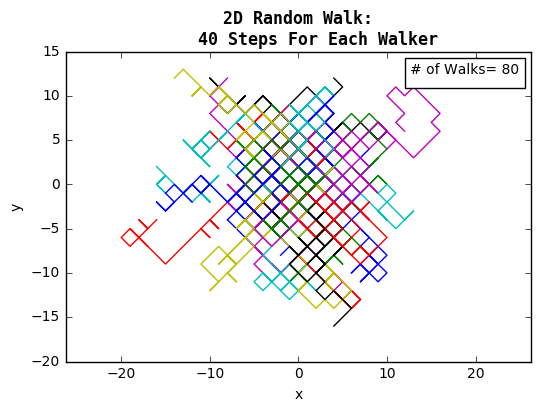

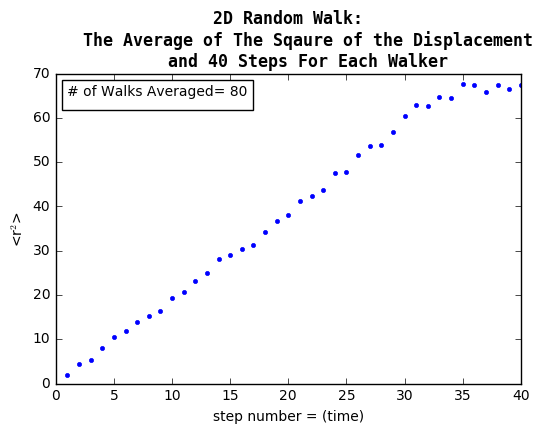

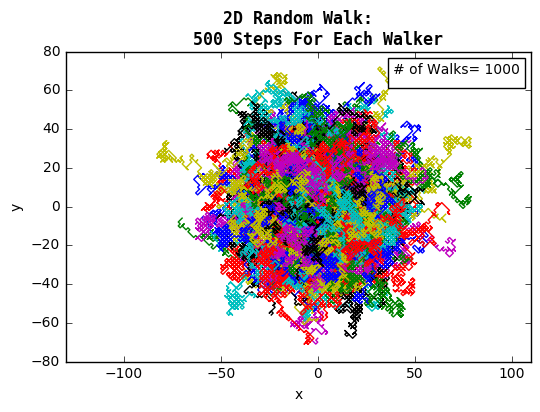

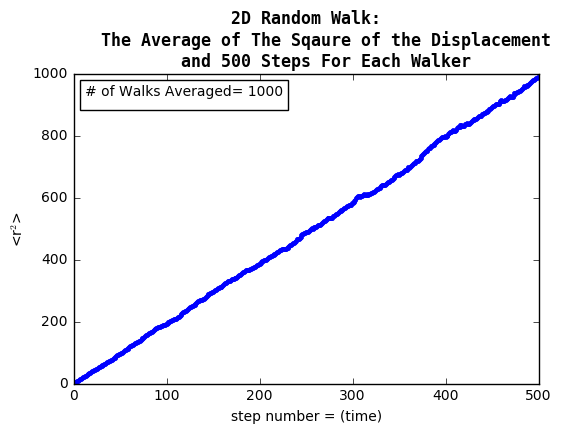

In [4]:
diffusion1,normal_r_squared1 =  random_walk(num_steps=40, num_walkers=80)
diffusion2,normal_r_squared2 =  random_walk(num_steps=500, num_walkers=1000)

In [5]:
diffusion_80=pd.Series(diffusion1)
diffusion_80.tail(20)

20    0.978571
21    0.961364
22    0.952174
23    0.990625
24    0.956000
25    0.992308
26    0.994444
27    0.962500
28    0.981034
29    1.005000
30    1.014516
31    0.979688
32    0.980303
33    0.948529
34    0.965714
35    0.937500
36    0.889189
37    0.885526
38    0.851282
39    0.841250
dtype: float64

In [6]:
diffusion_500=pd.Series(diffusion2)
diffusion_500.tail(20)

480    0.983958
481    0.985241
482    0.988099
483    0.989802
484    0.986466
485    0.986901
486    0.986883
487    0.987197
488    0.984720
489    0.984253
490    0.987642
491    0.987976
492    0.990718
493    0.990510
494    0.988752
495    0.990964
496    0.990189
497    0.990438
498    0.991407
499    0.989976
dtype: float64

#### Figure 1:

Random walks in two dimensions–on square lattice. Also, $<x^2>$ as a function of
step number (which is proportional to time), for a collection of 2D random walks–on square
lattice. The results for 80 and 500 walkers were averaged (two different plots). The points are
the calculated values. Diffusion constant data was also analytically solved for both random walk
plots (tail end data was output)

#### Triangular Lattice: 2D Random Walk

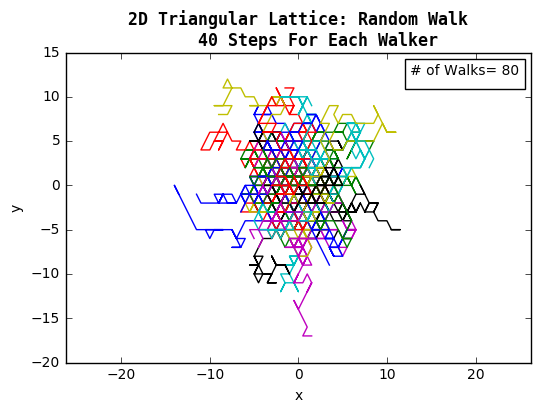

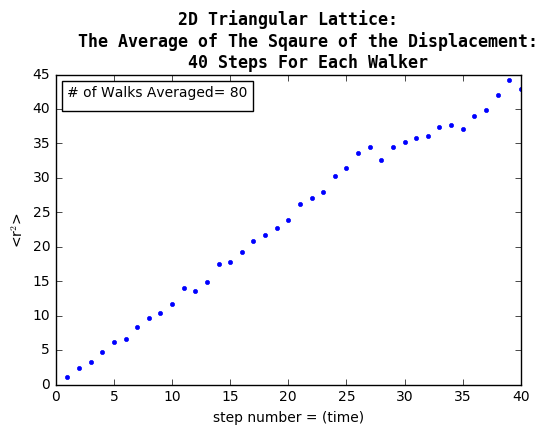

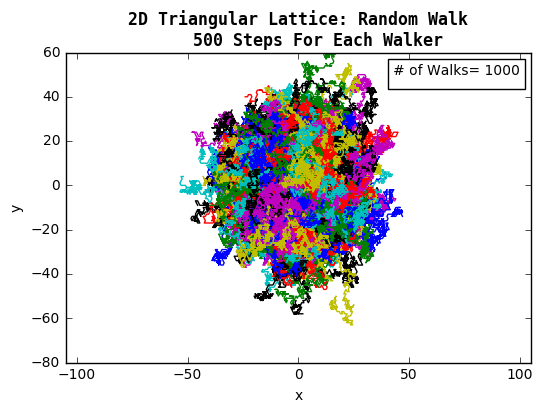

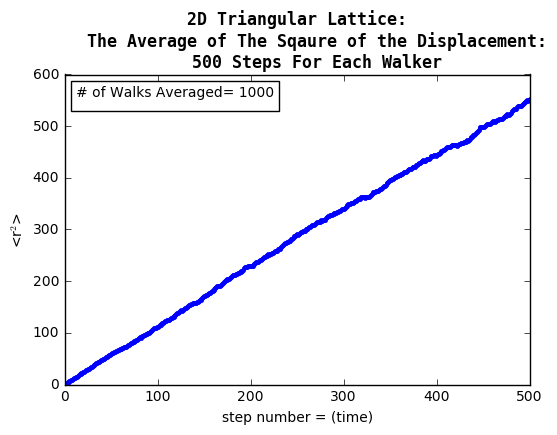

In [13]:
diffusion1_tri,normal_r_squared1_tri= triangle_lattice_random_walk(num_steps=40, num_walkers=80)
diffusion2_tri,normal_r_squared2_tri= triangle_lattice_random_walk(num_steps=500, num_walkers=1000)

In [14]:
diffusion_80_tri=pd.Series(diffusion1_tri)
diffusion_80_tri.tail(20)

20    0.625372
21    0.616477
22    0.607133
23    0.629818
24    0.629938
25    0.646394
26    0.638426
27    0.583092
28    0.594828
29    0.585625
30    0.578276
31    0.564307
32    0.566146
33    0.554871
34    0.529018
35    0.542274
36    0.538894
37    0.553331
38    0.567268
39    0.536055
dtype: float64

In [15]:
diffusion_500_tri=pd.Series(diffusion2_tri)
diffusion_500_tri.tail(20)

480    0.549310
481    0.550504
482    0.551836
483    0.551260
484    0.550409
485    0.552089
486    0.553224
487    0.552462
488    0.550374
489    0.550145
490    0.549794
491    0.550416
492    0.551105
493    0.551085
494    0.552410
495    0.553265
496    0.553845
497    0.551161
498    0.550960
499    0.551966
dtype: float64

#### Figure 2:

Random walks in two dimensions–on triangular lattice. Right plots: $<x^2>$ as a function
of step number (which is proportional to time), for a collection of 2D random walks–on trian-
gular lattice. The results for 80 and 500 walkers were averaged (two different plots). The points
are the calculated values. Diffusion constant data was also analytically solved for both random
walk plots (tail end data was output).

### Results:

#### Square Lattice 

The diffusion constant analytically solved for this problem is the slope of $<x^2>$ versus $t$
(time step) which is approximately 1 (seen more clearly when there are more steps for each walker, as
there is less error). As there are 4 ways the walk can move for each step in geometrical terms, from
deduction and equation 1, this value of 1 for the diffusion constant $D$ makes sense. The mean square
displacement averaged is 2. Even though the walks, individually, are random, the average random walk has
predictable behavior.

#### Triangle Lattice 

The diffusion constant analytically solved for this problem is also the slope of $<x^2>$
versus $t$ (time step) which is approximately 0.6 (seen more clearly when there are more steps for each
walker, as there is less error). As there are 6 ways the walk can move for each step in geometrical terms,
from deduction and equation 1, this value of 0.6 makes sense in comparison to the square
lattice-- as the mean square displacement must be less than 2 and is in fact 1.2.